In [1]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *

sqlContext = SQLContext(sc)
schema = StructType([ \
    StructField("state", StringType(), True), \
    StructField("account_length", DoubleType(), True), \
    StructField("area_code", StringType(), True), \
    StructField("phone_number", StringType(), True), \
    StructField("intl_plan", StringType(), True), \
    StructField("voice_mail_plan", StringType(), True), \
    StructField("number_vmail_messages", DoubleType(), True), \
    StructField("total_day_minutes", DoubleType(), True), \
    StructField("total_day_calls", DoubleType(), True), \
    StructField("total_day_charge", DoubleType(), True), \
    StructField("total_eve_minutes", DoubleType(), True), \
    StructField("total_eve_calls", DoubleType(), True), \
    StructField("total_eve_charge", DoubleType(), True), \
    StructField("total_night_minutes", DoubleType(), True), \
    StructField("total_night_calls", DoubleType(), True), \
    StructField("total_night_charge", DoubleType(), True), \
    StructField("total_intl_minutes", DoubleType(), True), \
    StructField("total_intl_calls", DoubleType(), True), \
    StructField("total_intl_charge", DoubleType(), True), \
    StructField("number_customer_service_calls", DoubleType(), True), \
    StructField("churned", StringType(), True)])

churn_data = sqlContext.read \
    .format('com.databricks.spark.csv') \
    .load('churn.all', schema = schema)

In [2]:
churn_data.show(1)

+-----+--------------+---------+------------+---------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-------+
|state|account_length|area_code|phone_number|intl_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|churned|
+-----+--------------+---------+------------+---------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+----

In [3]:
count = churn_data.count()
voice_mail_plans = churn_data.filter(churn_data.voice_mail_plan == " yes").count()

"%d, %d" % (count, voice_mail_plans)

'5000, 1323'

In [4]:
custcalss=churn_data.filter(churn_data.number_customer_service_calls>1).count()
custcalss

2191

In [5]:
sample_data = churn_data.sample(False, 0.5, 83).toPandas()
sample_data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128.0,415,382-4657,no,yes,25.0,265.1,110.0,45.07,...,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False.
1,OH,107.0,415,371-7191,no,yes,26.0,161.6,123.0,27.47,...,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False.
2,NJ,137.0,415,358-1921,no,no,0.0,243.4,114.0,41.38,...,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False.
3,OK,75.0,415,330-6626,yes,no,0.0,166.7,113.0,28.34,...,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False.
4,AL,118.0,510,391-8027,yes,no,0.0,223.4,98.0,37.98,...,101.0,18.75,203.9,118.0,9.18,6.3,6.0,1.70,0.0,False.


In [6]:
numeric_cols = ["account_length", "number_vmail_messages", "total_day_minutes",
                "total_day_calls", "total_day_charge", "total_eve_minutes",
                "total_eve_calls", "total_eve_charge", "total_night_minutes",
                "total_night_calls", "total_intl_minutes", "total_intl_calls",
                "total_intl_charge"]

categorical_cols = ["state", "international_plan", "voice_mail_plan", "area_code"]

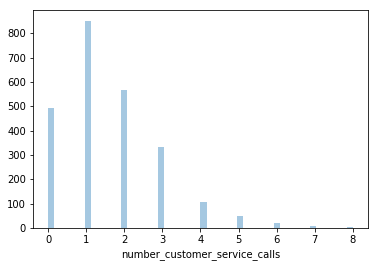

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sb.distplot(sample_data['number_customer_service_calls'], kde=False)

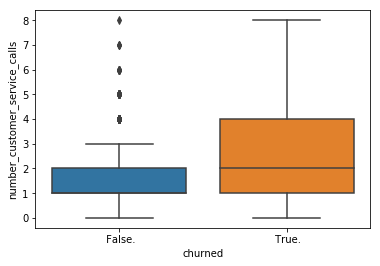

In [8]:
sb.boxplot(x="churned", y="number_customer_service_calls", data=sample_data)

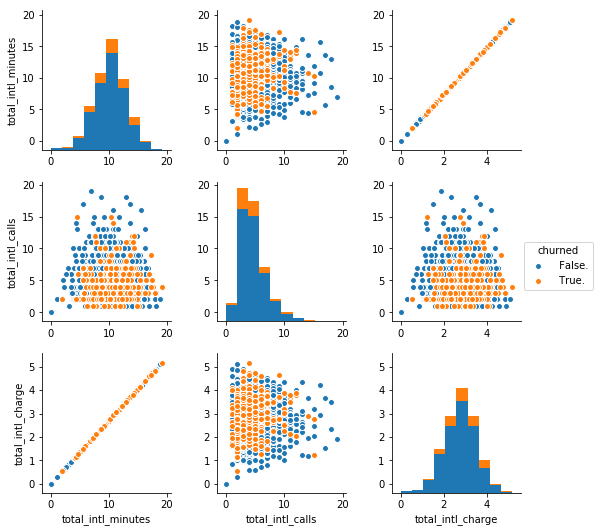

In [9]:
example_numeric_data = sample_data[["total_intl_minutes", "total_intl_calls",
                                       "total_intl_charge", "churned"]]
sb.pairplot(example_numeric_data, hue="churned")

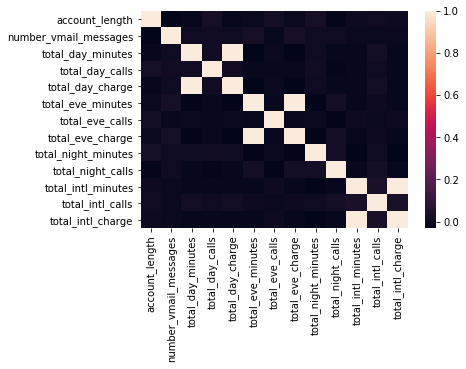

In [10]:
corr = sample_data[["account_length", "number_vmail_messages", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_intl_minutes", "total_intl_calls",
                    "total_intl_charge"]].corr()

sb.heatmap(corr)

[None, None, None, None, None, None, None, None, None, None, None, None, None]

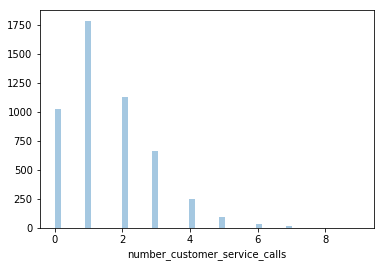

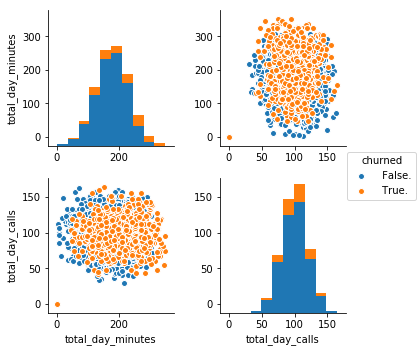

In [11]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
column_names = ["state",
          "acccount_length",
          "area_code",
          "phone_number",
          "international_plan",
          "voice_mail_plan",
          "number_vmail_messages",
          "total_day_minutes",
          "total_day_calls",
          "total_day_charge",
          "total_eve_minutes",
          "total_eve_calls",
          "total_eve_charge",
          "total_night_minutes",
          "total_night_calls",
          "total_night_charge",
          "total_intl_minutes",
          "total_intl_calls",
          "total_intl_charge",
          "number_customer_service_calls",
          "churned"]

continuousish_cols = ["acccount_length", "number_vmail_messages", "total_day_minutes", "total_day_calls", "total_day_charge",
                      "total_eve_minutes", "total_eve_calls", "total_eve_charge", "total_night_minutes", "total_night_calls",
                      "total_intl_minutes", "total_intl_calls", "total_intl_charge"]
                      
id_cols = ["area_code", "phone_number"]
categorical_cols = ["state", "international_plan", "voice_mail_plan"]

raw_data = pd.read_csv('data/churn.all', names=column_names)

#Make Plots
sb.distplot(raw_data['number_customer_service_calls'], kde=False)
plt.savefig('img/cust_service_calls_dist.png')

continuous_data = raw_data[["total_day_minutes", "total_day_calls", "churned"]]
sb.pairplot(continuous_data, hue="churned")
plt.savefig('img/related_data.png')

limited_cols = ["acccount_length", "number_vmail_messages", "number_customer_service_calls","total_day_calls",
                "total_night_calls", "total_eve_calls", "total_intl_calls", "churned"]
sb.pairplot(raw_data[limited_cols], hue="churned", palette='husl')
plt.savefig('img/pairwise_relations.png')

def make_box_plot(col_name):
  sb.boxplot(x="churned", y=col_name, data=raw_data)
  plt.savefig("img/boxplot/" + col_name + ".png")
  plt.clf()
  
def make_violin_plot(col_name):
  sb.violinplot(x="churned", y=col_name, data = raw_data)
  plt.savefig("img/violinplot/" +  col_name + ".png")
  plt.clf()

[make_box_plot(col) for col in continuousish_cols]
[make_violin_plot(col) for col in continuousish_cols]

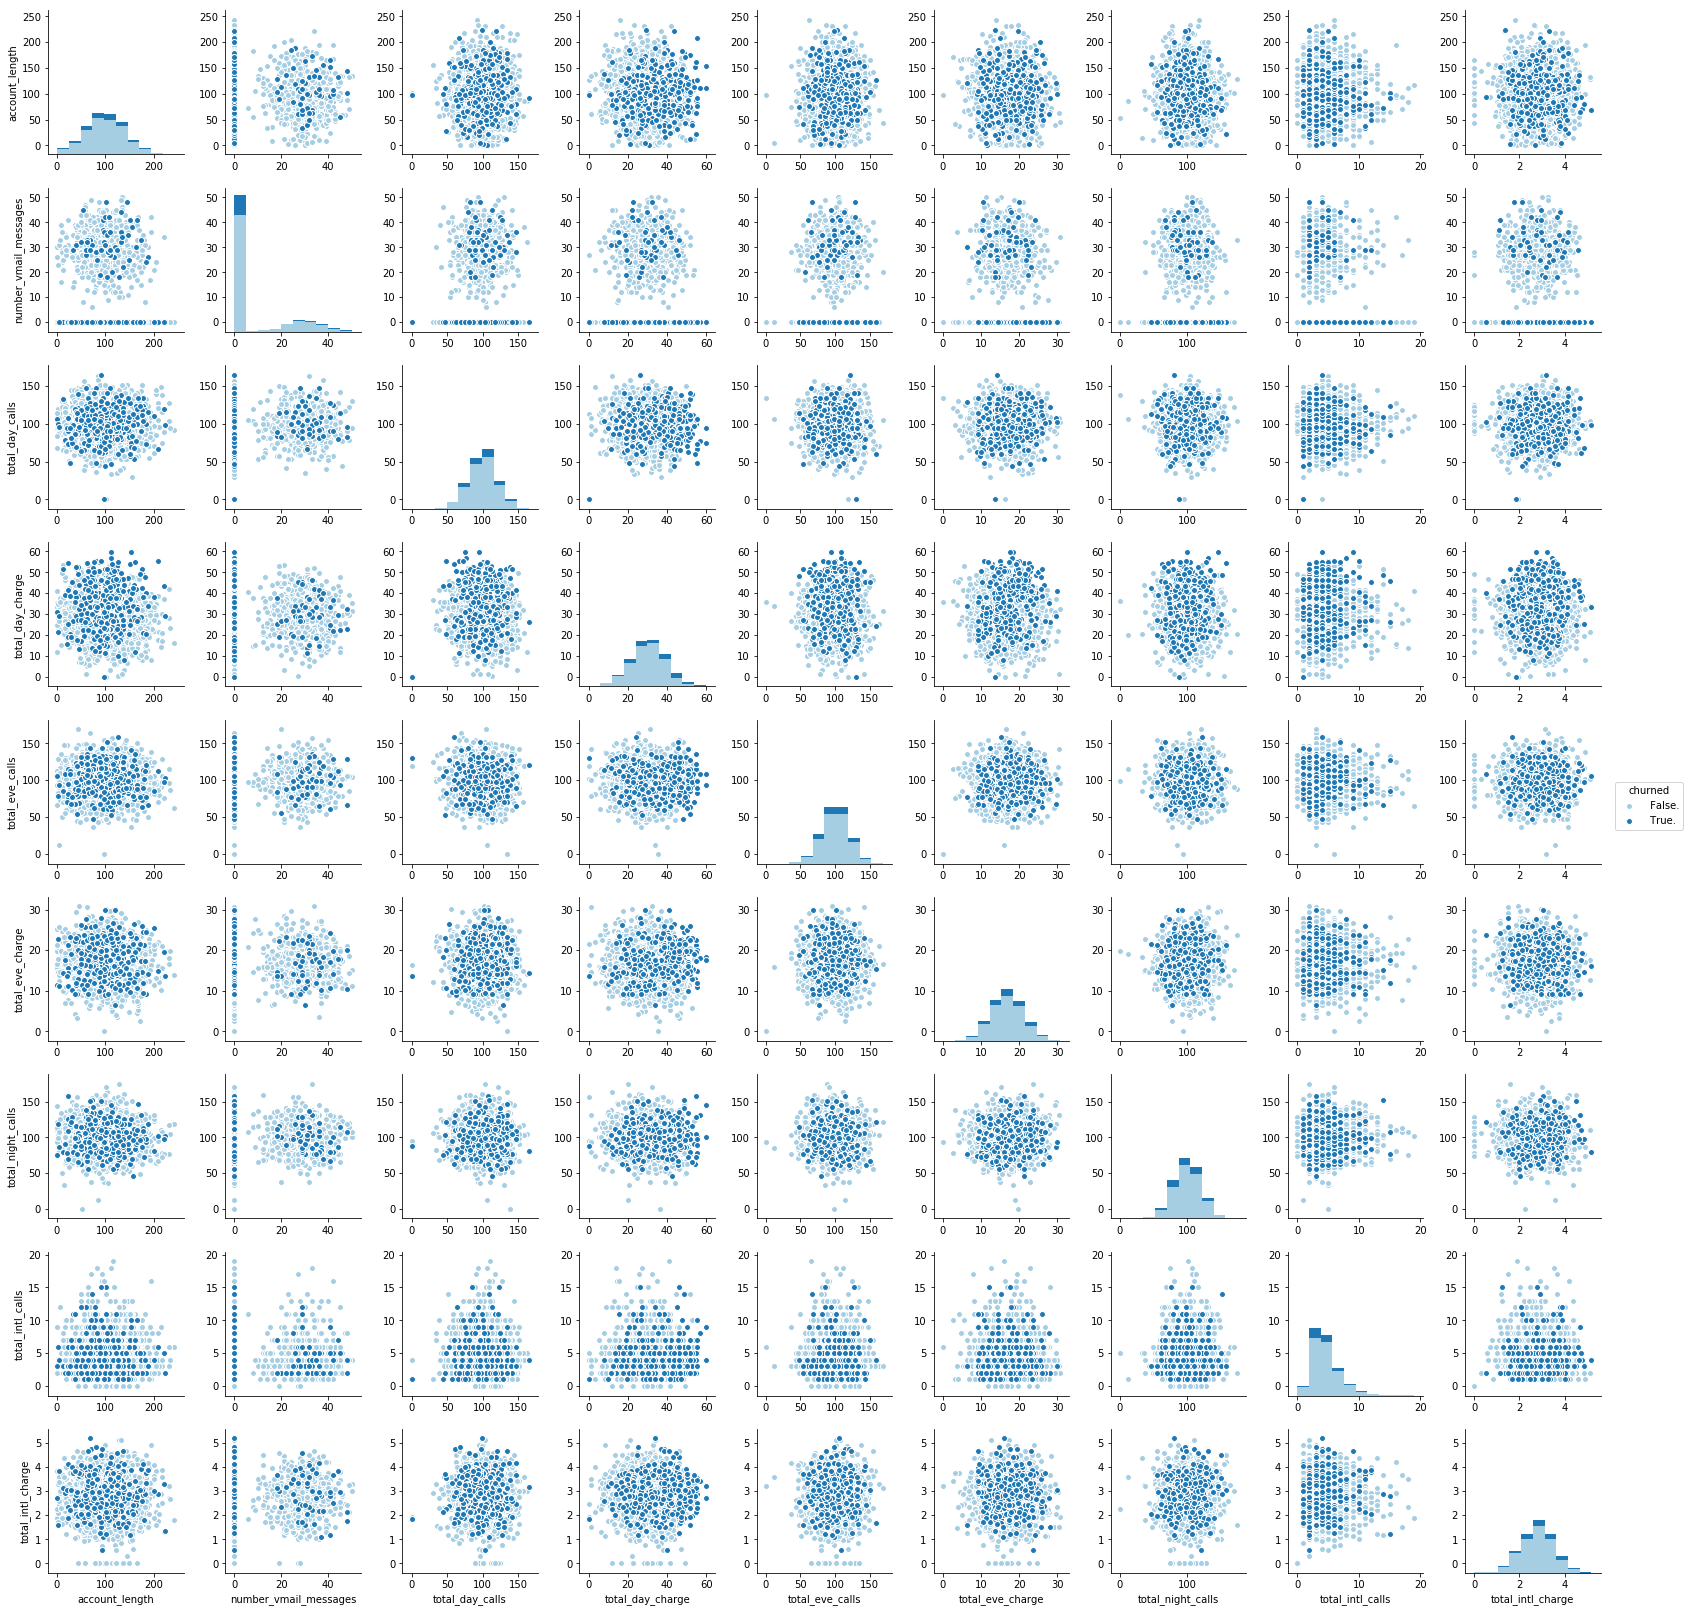

In [12]:
reduced_numeric_cols = ["account_length", "number_vmail_messages", "total_day_calls",
                        "total_day_charge", "total_eve_calls", "total_eve_charge",
                        "total_night_calls", "total_intl_calls", "total_intl_charge"]

sb.pairplot(sample_data[reduced_numeric_cols + ['churned']], hue="churned", palette='Paired')

In [13]:
# Feature Extraction and Model Training

#We need to:
#*# Code features that are not already numeric
#* Gather all features we need into a single column in the DataFrame.
#* Split labeled data into training and testing set
#* Fit the model to the training data.

## Feature Extraction
#We need to define our input features.


In [14]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

label_indexer = StringIndexer(inputCol = 'churned', outputCol = 'label')
plan_indexer = StringIndexer(inputCol = 'intl_plan', outputCol = 'intl_plan_indexed')

assembler = VectorAssembler(
    inputCols = ['intl_plan_indexed'] + reduced_numeric_cols,
    outputCol = 'features')

In [15]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier

classifier = DecisionTreeClassifier(labelCol = 'label', featuresCol = 'features')

pipeline = Pipeline(stages=[plan_indexer, label_indexer, assembler, classifier])

(train, test) = churn_data.randomSplit([0.7, 0.3])
model = pipeline.fit(train)

In [16]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

predictions = model.transform(test)
evaluator = BinaryClassificationEvaluator()
auroc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
aupr = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
"The AUROC is %s and the AUPR is %s." % (auroc, aupr)

'The AUROC is 0.47600113702543057 and the AUPR is 0.21383917754139137.'

In [17]:
from pyspark.ml.classification import RandomForestClassifier



In [18]:
# now fitting a random forrest classifier for better performance 

In [19]:
classifier = RandomForestClassifier(labelCol = 'label', featuresCol = 'features')

pipeline = Pipeline(stages=[plan_indexer, label_indexer, assembler, classifier])

(train, test) = churn_data.randomSplit([0.7, 0.3])
model = pipeline.fit(train)

In [20]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

predictions = model.transform(test)
evaluator = BinaryClassificationEvaluator()
auroc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
aupr = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
"The AUROC is %s and the AUPR is %s." % (auroc, aupr)

'The AUROC is 0.7955696300241571 and the AUPR is 0.6535953346515213.'